In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Return to dataset with iris petals
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
## Need to add a numerical version of classes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['class'])
le.transform(df['class'])
df['category']=le.transform(df['class'])
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,category
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
## Pick two of the four features.
## Convert to numpy.
## Neither necessary for knn.
## But both necessary for visualization!
X = df[["petal_len","petal_wid"]].to_numpy()
print(X.shape)
y=df['category'].to_numpy()
print(y.shape)

(150, 2)
(150,)


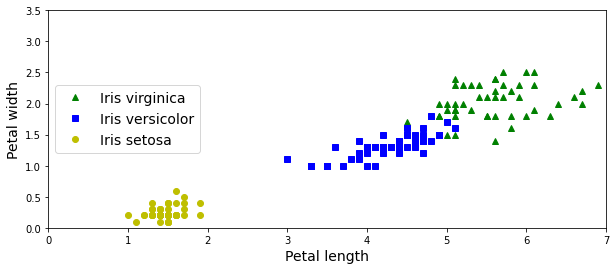

In [ ]:
## Graph our data with different markers for each class
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
## Create training and testing sets
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
## This works on either numpy arrays or DataFrames

In [ ]:
## If X,y are numpy arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(112, 2)


In [ ]:
## If X,y are DataFrames
X = df[["petal_len","petal_wid"]]
y=df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
## random_state=0 means we will get the same random split each time we run it
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(112, 2)


In [ ]:
## Question! Should we apply scaling for this data set?
X_train.head(10)

,petal_len,petal_wid
61,4.2,1.5
92,4.0,1.2
112,5.5,2.1
2,1.3,0.2
141,5.1,2.3
43,1.6,0.6
10,1.5,0.2
60,3.5,1.0
116,5.5,1.8
144,5.7,2.5


In [ ]:
## import knn from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
## apply knn to the training data
knn.fit(X_train, y_train)
## accuracy on training data ## Should be good here.
print("training score",knn.score(X_train,y_train))
## accuracy on the testing data ## Probably less good here.
print("testing score",knn.score(X_test, y_test))

training score 0.9910714285714286
testing score 0.9736842105263158


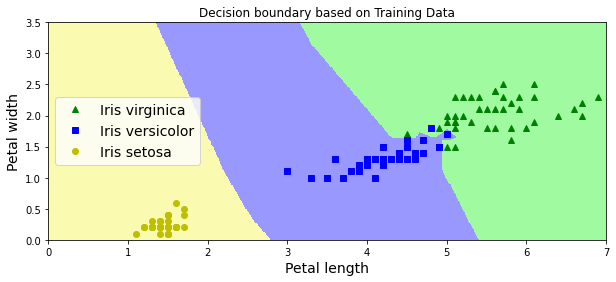

In [ ]:
## Plot the Decision Boundary and Training Data
X=X_train.to_numpy()
y=y_train.to_numpy()

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

knn.fit(X, y_train)
y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("Decision boundary based on Training Data")
plt.show()

In [ ]:
## How many does it get wrong?
len(X_train) - len(X_train)*knn.score(X_train,y)

1.0

In [ ]:
## Which ones does it get wrong?
df.loc[np.where(y!=knn.predict(X))]

,sepal_len,sepal_wid,petal_len,petal_wid,class,category
103,6.3,2.9,5.6,1.8,Iris-virginica,2


In [ ]:
## Why does it get the first one wrong?
df[(df['petal_len']==4.8) & (df['petal_wid']==1.8)]

,sepal_len,sepal_wid,petal_len,petal_wid,class,category
70,5.9,3.2,4.8,1.8,Iris-versicolor,1
126,6.2,2.8,4.8,1.8,Iris-virginica,2
138,6.0,3.0,4.8,1.8,Iris-virginica,2


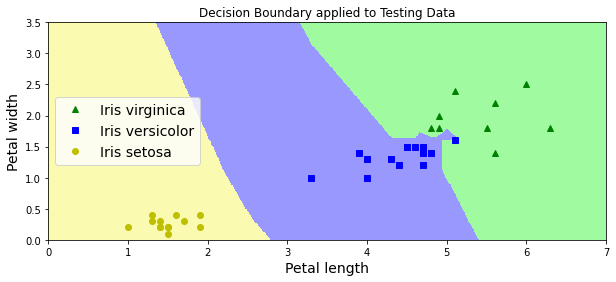

In [ ]:
## Plot same decision boundary (computed on training data)
## but with testing data
X=X_test.to_numpy()
y=y_test.to_numpy()
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("Decision Boundary applied to Testing Data")
plt.show()

In [ ]:
## How many does it get wrong?
len(X_test)-knn.score(X_test,y)*len(X_test)

1.0

In [ ]:
## Which ones does it get wrong?
df.loc[np.where(y!=knn.predict(X))]

,sepal_len,sepal_wid,petal_len,petal_wid,class,category
37,4.9,3.1,1.5,0.1,Iris-setosa,0


## Repeat with Scaled Data

In [ ]:
## Here's what we need to do to apply scaling on training data. 
mean_train=X_train.mean()
print("mean: \n",mean_train)
std_train=X_train.std()
print("standard deviation: \n",std_train)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
print(X_train[0:5])
print(X_train_scaled[0:5])
print("new mean: \n",np.mean(X_train_scaled, axis=0))
print("new std: \n",np.std(X_train_scaled,axis=0))

mean: 
 petal_len    3.796429
petal_wid    1.222321
dtype: float64
standard deviation: 
 petal_len    1.800697
petal_wid    0.782662
dtype: float64
     petal_len  petal_wid
61         4.2        1.5
92         4.0        1.2
112        5.5        2.1
2          1.3        0.2
141        5.1        2.3
[[ 0.22512685  0.35638175]
 [ 0.11355956 -0.02864805]
 [ 0.95031423  1.12644135]
 [-1.39259884 -1.31208072]
 [ 0.72717965  1.38312788]]
new mean: 
 [8.72318091e-17 2.65660509e-16]
new std: 
 [1. 1.]


In [ ]:
## 
X_test_scaled =scalar.transform(X_test)
print(X_test[0:5])
print(X_test_scaled[0:5])
print("new mean: \n",np.mean(X_test_scaled, axis=0))
print("new std: \n",np.std(X_test_scaled, axis=0))
## scale for training data, not testing data

     petal_len  petal_wid
114        5.1        2.4
62         4.0        1.0
33         1.4        0.2
107        6.3        1.8
7          1.5        0.2
[[ 0.72717965  1.51147115]
 [ 0.11355956 -0.28533458]
 [-1.33681519 -1.31208072]
 [ 1.39658338  0.74141155]
 [-1.28103155 -1.31208072]]
new mean: 
 [-0.08315118 -0.11983932]
new std: 
 [0.91980597 0.89642628]


In [ ]:
## compare to kNN on scaled data
knn.fit(X_train_scaled,y_train)
print("training score",knn.score(X_train_scaled,y_train))
## accuracy on the testing data ## Probably less good here.
print("testing score",knn.score(X_test_scaled, y_test))

training score 0.9910714285714286
testing score 0.9736842105263158


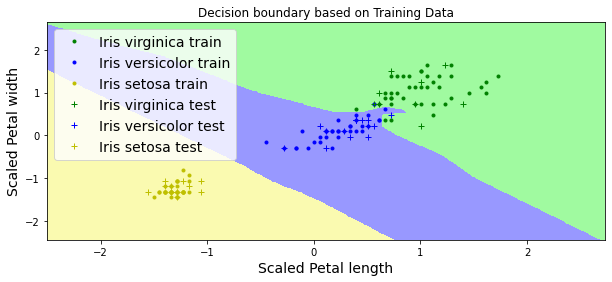

In [ ]:
## Plot the Decision Boundary and Training Data

X=X_train_scaled 
xmin=X[:,0].min()-1
xmax=X[:,0].max()+1
ymin=X[:,1].min()-1
ymax=X[:,1].max()+1

y=y_train.to_numpy()

x0,x1=np.meshgrid(
        np.linspace(xmin, xmax, 500).reshape(-1, 1),
        np.linspace(ymin, ymax, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

knn.fit(X, y_train)
y_predict = knn.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g.", label="Iris virginica train")
plt.plot(X[y==1, 0], X[y==1, 1], "b.", label="Iris versicolor train")
plt.plot(X[y==0, 0], X[y==0, 1], "y.", label="Iris setosa train")

Xt=X_test_scaled
yt=y_test
plt.plot(Xt[yt==2, 0], Xt[yt==2, 1], "g+", label="Iris virginica test")
plt.plot(Xt[yt==1, 0], Xt[yt==1, 1], "b+", label="Iris versicolor test")
plt.plot(Xt[yt==0, 0], Xt[yt==0, 1], "y+", label="Iris setosa test")


from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Scaled Petal length", fontsize=14)
plt.ylabel("Scaled Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Decision boundary based on Training Data")
plt.show()